<a href="https://colab.research.google.com/github/sidhu2690/IDC-410/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Function Description: Generate Data Set with Dependent and Independent Variables

The function generates a dataset consisting of m + 1 dimensional data, where n is the size of the dataset, m is the number of continuous independent variables, and Y is the dependent variable defined as:

yi = xiβ + e

Where:

e is a Gaussian distribution with mean 0 and standard deviation σ, representing the unexplained variation in Y.
β is a random vector of dimensionality m + 1, representing the coefficients of the linear relationship between X and Y.
For all i in the range [1, n], xi0 = 1.
Function Parameters:

σ: The spread of noise in the output variable.
n: The size of the dataset.
m: The number of independent variables.
Output from the Function:

X: An n × m numpy array of independent variable values (with a 1 in the first column).
Y: The n × 1 numpy array of output values.
β: The random coefficients used to generate Y from X.

###Generate data


In [2]:
import numpy as np

def generate_dataset(sigma, n, m):
    beta = np.random.normal(size=(m + 1, 1))
    X = np.hstack([np.ones((n, 1)), np.random.normal(size=(n, m))])
    e = np.random.normal(scale=sigma, size=(n, 1))
    Y = X.dot(beta) + e
    return X, Y, beta

###Linear regression

In [3]:
def linear_regression_gradient_descent(X, Y, k, tau, learning_rate):
    beta = np.random.normal(size=(X.shape[1], 1))
    prev_cost = np.inf
    for epoch in range(k):
        Y_pred = X.dot(beta)
        error = Y_pred - Y
        cost = np.mean(error ** 2) / 2
        if np.abs(cost - prev_cost) < tau:
            break
        gradient = X.T.dot(error)
        beta -= learning_rate * gradient / len(Y)
        prev_cost = cost
    return beta, cost


###Training

In [14]:
sigma = 1.0
n = 100
m = 1
k = 10000
tau = 1e-6
learning_rate = 0.01
X, Y, true_beta = generate_dataset(sigma, n, m)
beta_gd, final_cost = linear_regression_gradient_descent(X, Y, k, tau, learning_rate)

###Scattered plot

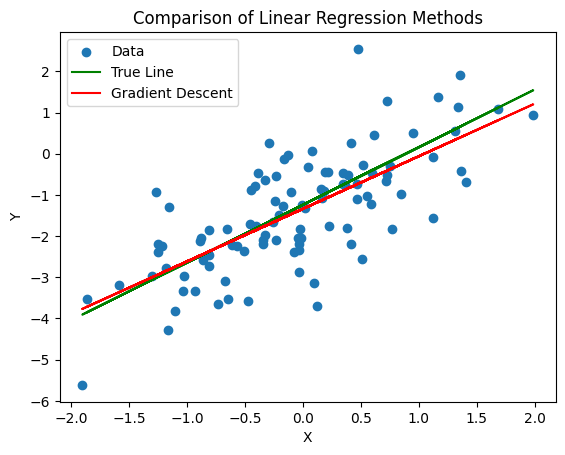

In [15]:
plt.scatter(X[:,1], Y, label='Data')
plt.plot(X[:,1], X.dot(true_beta), color='green', label='True Line')
plt.plot(X[:,1], X.dot(beta_gd), color='red', label='Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Linear Regression Methods')
plt.legend()
plt.show()